In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("hr_raw_data_nonulls.csv") 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,51,No,Unknown,684.0,Research & Development,6,High School,"162,0",Very Low,Male,51.0,Medium,Director,Research Director,Medium,Unknown,19537.000000,6462,7,No,13,"3,0",Medium,Zero,32.587161,5,"3,0",20,15,15,Yes
1,52,No,Unknown,699.0,Research & Development,1,Bachelor's,"259,0",Medium,Male,65.0,Low,Director,Manager,Medium,Unknown,19999.000000,5678,0,No,14,"3,0",Very Low,Low,34.000000,5,"3,0",33,11,9,Yes
2,42,No,Travel Rarely,532.0,Research & Development,4,Secondary,"319,0",Medium,Male,58.0,Medium,Director,Manager,High,Married,19232.000000,4933,1,No,11,"3,0",High,Zero,22.000000,3,"3,0",22,11,15,Yes
3,47,No,Travel Rarely,359.0,Research & Development,2,Bachelor's,Unknown,Very Low,Female,82.0,Medium,Manager,Research Director,Medium,Married,17169.000000,26703,3,No,19,"3,0",Low,Medium,28.789780,2,"3,0",20,5,6,No
4,46,No,Unknown,1319.0,Research & Development,3,High School,Unknown,Very Low,Female,45.0,High,Manager,Sales Executive,Very Low,Divorced,6399.663531,7739,2,No,12,"3,0",High,Low,11.520610,5,"3,0",19,2,8,No


Distribución de la Satisfacción Laboral: Este gráfico muestra la cantidad de empleados en cada nivel de satisfacción laboral, desde el más bajo hasta el más alto.

Objetivo: Identificar niveles generales de satisfacción laboral.

Interpretación: Este gráfico muestra cuántos empleados se encuentran en cada nivel de satisfacción. Si hay muchos empleados que están en niveles bajos, podría sugerir problemas en el ambiente laboral.

Conclusión: Una gran parte de los empleados tiene una baja satisfacción laboral, lo que podría ser un factor que contribuye a la rotación de empleados. causas de esto??

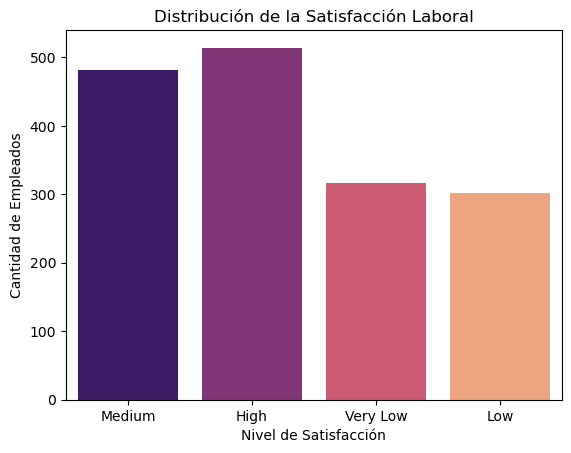

In [5]:
# Gráfico de barras para la satisfacción laboral
sns.countplot(data=df, x='JobSatisfaction', palette="magma")
plt.title('Distribución de la Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Cantidad de Empleados')
plt.show()

Distribución de la Satisfacción del Entorno Laboral (EnvironmentSatisfaction)

Objetivo: Evaluar la satisfacción con el entorno laboral y cómo se distribuye entre los empleados.


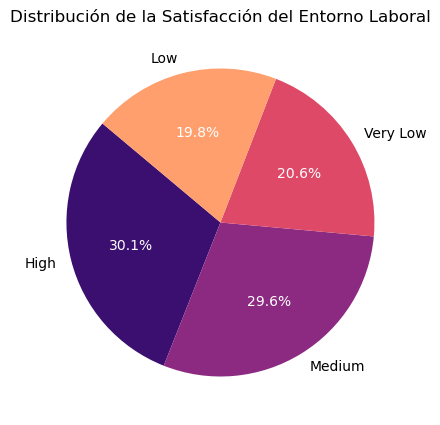

In [10]:
satisfaction_counts = df['EnvironmentSatisfaction'].value_counts()

plt.figure(figsize=(5,5))
wedges, texts, autotexts=plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma', len(satisfaction_counts)))

plt.title('Distribución de la Satisfacción del Entorno Laboral')
for autotext in autotexts:
    autotext.set_color("white")

plt.show()

Comparación de Satisfacción Laboral entre Departamentos: Aquí se compara la satisfacción promedio entre diferentes departamentos, lo que ayuda a identificar cuáles pueden tener problemas de satisfacción.

Objetivo: Determinar si ciertos departamentos tienen problemas específicos de satisfacción.

Interpretación: Compara la satisfacción promedio entre diferentes departamentos. Identifica departamentos con baja satisfacción, lo cual podría estar relacionado con la gestión, el tipo de trabajo o los recursos disponibles.

Conclusión: El departamento de Ventas muestra significativamente menor satisfacción laboral en comparación con otros departamentos. Esto podría estar relacionado con altos niveles de estrés o falta de recursos.


In [14]:
import warnings
warnings.filterwarnings("ignore")
sns.barplot(data=df, x='Department', y='JobSatisfaction')
plt.title('Satisfacción Laboral por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Nivel de Satisfacción Promedio')
plt.xticks(rotation=45)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

Impacto del Ingreso Mensual en la Satisfacción Laboral: Un boxplot que compara los ingresos mensuales con los niveles de satisfacción laboral, mostrando la mediana y la variabilidad de los salarios en cada nivel de satisfacción.

Objetivo: Verificar si el salario influye en la satisfacción laboral.

Interpretación: Visualiza cómo varía el ingreso mensual con la satisfacción laboral. Identifica si el salario es un factor de satisfacción.

Conclusión: Los empleados con salarios más altos tienden a reportar mayores niveles de satisfacción. Esto sugiere que mejorar los salarios podría incrementar la satisfacción y, en consecuencia, la retención.


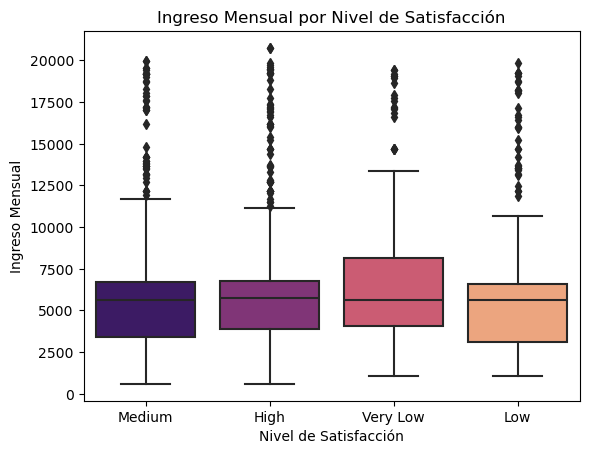

In [16]:
sns.boxplot(data=df, x='JobSatisfaction', y='MonthlyIncome', palette="magma")
plt.title('Ingreso Mensual por Nivel de Satisfacción')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Ingreso Mensual')
plt.show()


Relación entre Años en la Compañía y Satisfacción Laboral: Gráfico de dispersión que muestra si hay una relación entre los años que un empleado ha estado en la empresa y su satisfacción laboral.

Objetivo: Determinar si la antigüedad afecta la satisfacción laboral.

Interpretación: Muestra la relación entre el tiempo que un empleado ha estado en la empresa y su nivel de satisfacción laboral.

Conclusión: La satisfacción laboral disminuye ligeramente con el tiempo en la empresa, lo que podría indicar una falta de oportunidades de crecimiento o desarrollo para empleados de larga duración.

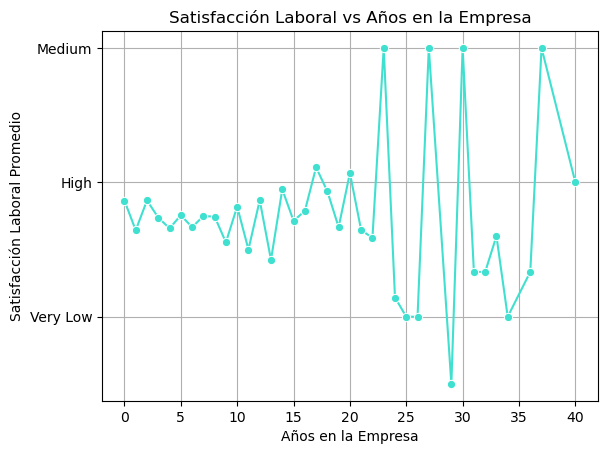

In [18]:
sns.lineplot(data=df, x='YearsAtCompany', y='JobSatisfaction', ci=None, marker='o', color="turquoise")
plt.title('Satisfacción Laboral vs Años en la Empresa')
plt.xlabel('Años en la Empresa')
plt.ylabel('Satisfacción Laboral Promedio')
plt.grid(True)
plt.show()

Evaluación de la Satisfacción Laboral por Rol: Este gráfico compara la satisfacción laboral entre diferentes roles dentro de la empresa.

Objetivo: Identificar roles con problemas de satisfacción.

Interpretación: Compara la satisfacción laboral entre diferentes roles.

Conclusión: Ciertos roles, como el de Representante de Ventas, muestran menores niveles de satisfacción laboral, lo que podría estar relacionado con altos niveles de presión o falta de autonomía.

In [19]:
sns.barplot(data=df, x='JobRole', y='JobSatisfaction')
plt.title('Satisfacción Laboral por Rol')
plt.xlabel('Rol de Trabajo')
plt.ylabel('Nivel de Satisfacción Promedio')
plt.xticks(rotation=60)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

Frecuencia de Horas Extras y su Relación con la Satisfacción: Otro gráfico de dispersión que muestra la relación entre las horas extras trabajadas y la satisfacción laboral.

Objetivo: Analizar el efecto de las horas extras en la satisfacción.

Interpretación: Visualiza si trabajar horas extras está relacionado con la satisfacción laboral.

Conclusión: Los empleados que trabajan más horas extras tienden a reportar menores niveles de satisfacción, lo que sugiere que la sobrecarga de trabajo podría estar afectando negativamente su bienestar.

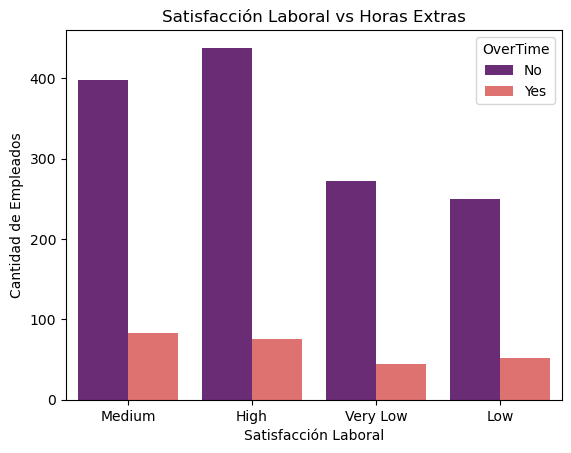

In [20]:
sns.countplot(data=df, x='JobSatisfaction', hue='OverTime', palette='magma')

# Añadir título y etiquetas
plt.title('Satisfacción Laboral vs Horas Extras')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Cantidad de Empleados')

# Mostrar el gráfico
plt.show()


Impacto de las Oportunidades de Capacitación en la Satisfacción: Aquí se analiza si la cantidad de oportunidades de capacitación recibidas por los empleados influye en su satisfacción laboral.

Objetivo: Verificar si la capacitación influye en la satisfacción.

Interpretación: Muestra la relación entre la cantidad de capacitación recibida y la satisfacción laboral.

Conclusión: Los empleados que recibieron más capacitación tienden a estar más satisfechos, lo que sugiere que las oportunidades de desarrollo profesional son valoradas y pueden contribuir a una mayor satisfacción y retención.

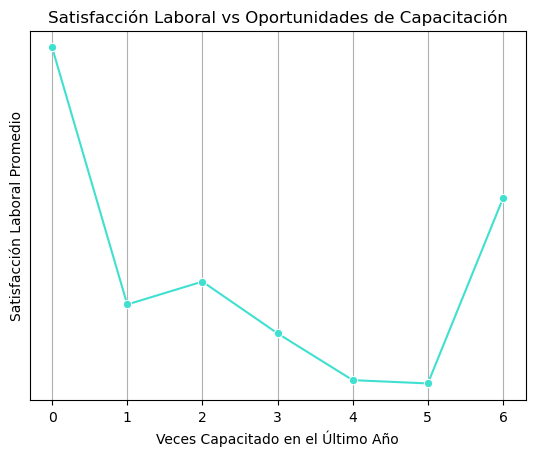

In [22]:
sns.lineplot(data=df, x='TrainingTimesLastYear', y='JobSatisfaction', ci=None, marker='o', color="turquoise")
plt.title('Satisfacción Laboral vs Oportunidades de Capacitación')
plt.xlabel('Veces Capacitado en el Último Año')
plt.ylabel('Satisfacción Laboral Promedio')
plt.grid(True)
plt.show()

Relación entre Género y Satisfacción Laboral

Descripción: Este gráfico de barras muestra el nivel promedio de satisfacción laboral desglosado por género. Cada barra representa el nivel de satisfacción promedio para empleados masculinos y femeninos.

Objetivo: Evaluar si existen diferencias en la satisfacción laboral entre empleados de diferentes géneros.

Interpretación: Compara los niveles promedio de satisfacción laboral entre hombres y mujeres. Unas barras significativamente diferentes podrían indicar una disparidad en la experiencia laboral entre géneros.

Conclusión: El gráfico muestra que la satisfacción laboral promedio es similar entre hombres y mujeres. Esto sugiere que, en general, la empresa proporciona un ambiente de trabajo equitativo para ambos géneros. No se observan diferencias significativas que indiquen una disparidad en la experiencia laboral entre géneros.

In [23]:
sns.barplot(data=df, x='Gender', y='JobSatisfaction', ci=None)
plt.title('Satisfacción Laboral por Género')
plt.xlabel('Género')
plt.ylabel('Nivel de Satisfacción Promedio')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.